# 챕터4 NumPy 기본: 배열과 벡터 연산

In [75]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [76]:
%time for _ in range(10) : my_arr2 = my_arr * 2

CPU times: total: 46.9 ms
Wall time: 50.1 ms


In [78]:
%time for _ in range(10) : my_list2 = [x * 2 for x in my_list]

CPU times: total: 2.45 s
Wall time: 2.52 s


NumPy를 이용한 코드가 순수 파이썬으로 작성한 코드보다 10배 ~ 100배 빠르고 메모리도 더 적게 사용함

## 4.1 NumPy ndarray : 다차원 배열 객체

In [3]:
import numpy as np

# 임의의 값 생성
data = np.random.randn(2,3)

data

array([[-0.02180247,  0.40194495, -1.19440817],
       [-0.25405425, -1.45856023, -0.42923843]])

In [4]:
data * 10

array([[ -0.2180247 ,   4.01944953, -11.94408168],
       [ -2.54054245, -14.5856023 ,  -4.2923843 ]])

In [5]:
data + data

array([[-0.04360494,  0.80388991, -2.38881634],
       [-0.50810849, -2.91712046, -0.85847686]])

In [6]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### 4.1.1 ndarray 생성하기

In [7]:
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [8]:
# 같은 길이를 가지는 리스트를 내포하고 있는 순차데이터 → 다차원 배열로 변환
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
# data2 : 리스트를 담고있는 리스트이므로
# arr2는 형태를 추론하여 2차원 형태로 생성됨
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


In [10]:
# 명시적으로 지정하지 않는 한 np.array는 생성될 때 적절한 자료형 추론
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [11]:
# zeros나 ones는 주어진 길이나 모양에 각각 0과 1이 들어있는 배열 생성
print(np.zeros(10))
print('')
print(np.zeros((3,6)))
print('')
print(np.zeros((2,3,2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]


In [12]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 4.1.2 ndarray의 dtype

dtype : nparray가 메모리에 있는 특정 데이터를 해석하기 위해 필요한 정보를 담고있는 특수한 객체

In [13]:
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.int32)

print(arr1.dtype)
print(arr2.dtype)                

float64
int32


In [14]:
# ndarray의 astype 메서드를 사용해 배열의 dtype을 다른 형으로 명시적으로 변환
arr = np.array([1,2,3,4,5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int32
float64


In [15]:
# 부동 소수점수를 정수형 dtype으로 변환하면 소수점 아래는 버려짐
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.astype(np.int32))

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
[ 3 -1 -2  0 12 10]


In [16]:
# 숫자 형식의 문자열을 담고 있는 배열이 있다면 astype을 사용하여 숫자로 변환 가능
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [17]:
# 다른 배열의 dtype 속성을 이용하는 것도 가능
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype = np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [18]:
# dtype으로 사용할 수 있는 축약코드도 존재
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### 4.1.3 NumPy 배열의 산술 연산

In [19]:
arr = np.array([[1.,2,3.],[4.,5.,6.]])
print(arr)
print(arr*arr)
print(arr-arr)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]


In [20]:
# 스칼라 인자가 포함된 산술 연산의 경우 배열 내의 모든 원소에 스칼라 인자 적용됨
print(1/arr)
print(arr**0.5)

[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]


In [21]:
# 같은 크기를 배열 간의 비교 연산은 불리언 배열을 반환
arr2 = np.array([[0.,4.,1.], [7.,2.,12.]])
print(arr2)
print(arr2>arr)

[[ 0.  4.  1.]
 [ 7.  2. 12.]]
[[False  True False]
 [ True False  True]]


### 4.1.4 색인과 슬라이싱 기초

In [24]:
# 데이터의 부분집합이나 개별 요소를 선택하기
arr = np.arange(10)

print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [25]:
# arr[5:8]=12 처럼 배열 조각에 스칼라값을 대입하면 12가 선택 영역 전파로 브로드캐스팅됨
# 리스트와의 차이점 : 배열 조각은 원본 배열의 뷰(데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영)
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [26]:
# arr_slice의 값 변경하면 원래 배열인 arr의 값도 바뀜
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [27]:
# 단순히 [:]로 슬라이스를 하면 배열의 모든 값 할당
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

NumPy는 데이터가 복사되지 않음
대용량의 데이터 처리를 염두에 두고 설계되었기 때문에 데이터 복사를 남발한다면 성능과 메모리 문제에 마주칠 것

In [28]:
# 다차원 배열을 다룰 땐 좀 더 많은 옵션이 있음
# 2차원 배열에서 각 색인에 해당하는 요소를 스칼라값이 아닌 1차원 배열
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])

arr2d[2]

array([7, 8, 9])

In [29]:
# 개별 요소에 재귀적으로 접근하기 귀찮을때, 콤마로 구분된 색인 리스트 넘기기
print(arr2d[0][2])
print(arr2d[0,2])

3
3


In [32]:
# 다차원 배열에서 마지막 색인을 생략할 시 반환되는 객체는 상위 차원의 데이터를 포함하고 있는 한 차원 낮은 ndarray가 됨
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [33]:
# arr3d[0]은 2x3 크기의 배열
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [35]:
# arr3d[0]에는 스칼라값과 배열 모두 대입할 수 있음
old_values = arr3d[0].copy()
arr3d[0] = 42
print(arr3d)
print('')
arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [36]:
# arr3d[1,0]은 (1,0)으로 색인되는 1차원 배열과 그 값을 반환
arr3d[1,0]

array([7, 8, 9])

In [37]:
# 두번에 걸쳐 인덱싱한 결과와 동일
x = arr3d[1]
print(x)
print(x[0])

[[ 7  8  9]
 [10 11 12]]
[7 8 9]


In [38]:
# 슬라이스로 선택하기
print(arr)
print(arr[1:6])

[ 0  1  2  3  4 64 64 64  8  9]
[ 1  2  3  4 64]


In [40]:
# 2차원 배열 슬라이싱하기
print(arr2d)
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [41]:
# 색인을 여러개 넘겨서 다차원 슬라이싱하기
print(arr2d[:2,1:])

[[2 3]
 [5 6]]


In [42]:
# 두번째 로우에서 처음 두 컬럼만 선택하고 싶을 때
print(arr2d[1,:2])

[4 5]


In [43]:
# 처음 두 로우에서 세번째 컬럼만 선택하고 싶을 때
arr2d[:2,2]

array([3, 6])

In [44]:
# 전체 축 선택
arr2d[:,:1]

array([[1],
       [4],
       [7]])

### 4.1.5 불리언값으로 선택하기

In [45]:
#중복된 이름이 포함된 배열에서 numpy.random 모듈에 있는 randn함수를 사용해 임의의 표준정규분포 데이터 생성
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-1.33001577  0.66656008 -0.32116696 -0.60020338]
 [ 0.96592756 -0.98141798 -0.23156317 -0.46301812]
 [ 0.86461453  0.50338364 -0.540127    0.46868096]
 [ 0.79205491 -1.29575086  0.74208997 -0.18452137]
 [-1.10816655  0.63865398 -0.00168153 -1.20595432]
 [-0.36230471 -0.4237354   0.49233798 -1.06342025]
 [ 0.12325274  0.19715852  0.16694706  0.86349858]]


In [46]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [47]:
# 불리언 배열을 배열의 색인으로 사용 가능
data[names == 'Bob']

array([[-1.33001577,  0.66656008, -0.32116696, -0.60020338],
       [ 0.79205491, -1.29575086,  0.74208997, -0.18452137]])

In [48]:
# names == 'Bob'인 로우에서 2: 컬럼 선택
print(data[names == 'Bob', 2:])
print(data[names == 'Bob', 3])

[[-0.32116696 -0.60020338]
 [ 0.74208997 -0.18452137]]
[-0.60020338 -0.18452137]


In [50]:
# Bob이 아닌 요소들을 선택하기
print(names != 'Bob')
print(data[~(names == 'Bob')])

[False  True  True False  True  True  True]
[[ 0.96592756 -0.98141798 -0.23156317 -0.46301812]
 [ 0.86461453  0.50338364 -0.540127    0.46868096]
 [-1.10816655  0.63865398 -0.00168153 -1.20595432]
 [-0.36230471 -0.4237354   0.49233798 -1.06342025]
 [ 0.12325274  0.19715852  0.16694706  0.86349858]]


In [57]:
# ~ 연산자는 일반적인 조건을 반대로 쓰고싶을 때 사용
cond = names == 'Bob'

data[~cond]

array([-0.36230471, -0.4237354 ,  0.49233798, -1.06342025])

In [58]:
# 3가지 중 2가지 선택하려면 &나 | 같은 논리 연산자 사용
mask = (names == 'Bob') | (names == 'Will')
print(mask)
print(data[mask])

True
[[[-1.33001577  0.66656008 -0.32116696 -0.60020338]
  [ 0.96592756 -0.98141798 -0.23156317 -0.46301812]
  [ 0.86461453  0.50338364 -0.540127    0.46868096]
  [ 0.79205491 -1.29575086  0.74208997 -0.18452137]
  [-1.10816655  0.63865398 -0.00168153 -1.20595432]
  [-0.36230471 -0.4237354   0.49233798 -1.06342025]
  [ 0.12325274  0.19715852  0.16694706  0.86349858]]]


In [59]:
# data에 저장된 모든 음수를 0으로 대입할때
data[data < 0] = 0
print(data)

[[0.         0.66656008 0.         0.        ]
 [0.96592756 0.         0.         0.        ]
 [0.86461453 0.50338364 0.         0.46868096]
 [0.79205491 0.         0.74208997 0.        ]
 [0.         0.63865398 0.         0.        ]
 [0.         0.         0.49233798 0.        ]
 [0.12325274 0.19715852 0.16694706 0.86349858]]


In [60]:
# 1차원 불리언 배열을 사용해 전체 로우나 컬럼을 선택하기
data[names != 'Joe'] = 7
print(data)

[[7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]
 [7. 7. 7. 7.]]


### 4.1.6 팬시 색인

팬시색인 : 정수 배열을 사용한 색인을 설명하기 위해 NumPy에서 차용한 단어

In [61]:
# 예시) 8x4 배열
arr = np.empty((8,4))

for i in range(8):
    arr[i] = i

print(arr)

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]


In [62]:
# 특정한 순서로 로우 선택하고 싶을 때
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [63]:
# 색인으로 음수 사용 시 끝에서부터 로우 선택
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [65]:
# 다차원 색인 배열 넘기기 -> 각각의 색인 튜플에 대응하는 1차원 배열 선택됨
arr = np.arange(32).reshape((8,4))
print(arr)
print(arr[[1,5,7,2],[0,3,1,2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
[ 4 23 29 10]


In [66]:
# 행렬의 행과 열에 대응하는 사각형 모양의 값 선택하려면
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 4.1.7 배열 전치와 축 바꾸기

배열 전치 : 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰를 반환하는 특별한 기능

In [68]:
arr = np.arange(15).reshape((3,5))
print(arr)
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [70]:
# 행렬의 내적은 np.dot을 이용해서 구할 수 있음
arr = np.random.randn(6,3)

print(arr)
print(np.dot(arr.T,arr))

[[ 0.23682417  0.8624826   1.29471825]
 [ 0.8784804  -0.68663487  0.74849047]
 [ 0.76738858  1.5414299  -1.50632633]
 [ 0.24543769  2.28322909 -1.69017385]
 [-0.28695235  0.54867963  0.39182112]
 [-1.75201262 -0.11417477 -1.18585951]]
[[ 4.62882827  1.38691835  1.35859165]
 [ 1.38691835  9.11857012 -5.22783874]
 [ 1.35859165 -5.22783874  8.92202656]]


In [72]:
# 다차원 배열의 경우 transpose 메서드는 튜플로 축 번호를 받아서 치환
arr = np.arange(16).reshape((2,2,4))
print(arr)
print(arr.transpose((1,0,2)))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [73]:
# swapaxes : 두개의 축 번호를 받아 배열을 뒤바꿈(데이터 복사하지 않고 원래 데이터에 대한 뷰 반환)
print(arr)
print(arr.swapaxes(1,2))

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  4]
  [ 1  5]
  [ 2  6]
  [ 3  7]]

 [[ 8 12]
  [ 9 13]
  [10 14]
  [11 15]]]


## 4.2 유니버설 함수 : 배열의 각 원소를 빠르게 처리하는 함수

유니버설(`ufunc`) 함수 : `ndarray` 안에 있는 데이터 원소별로 연산을 수행하는 함수
(하나 이상의 스칼라값을 받아 하나 이상의 스칼라 결괏값을 반환하는 함수를 고속으로 수행)

In [79]:
# sqrt나 exp 같은 간단한 변형을 전체 원소에 적용 가능
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [80]:
# add나 maximum처럼 2개의 인자를 취해서 단일 배열 반환(이항 유니버설 함수)
x = np.random.randn(8)
y = np.random.randn(8)

print(x)
print(y)
print(np.maximum(x,y))

[ 0.59861291  0.75906481 -0.34324914 -0.23269163 -1.51333391 -0.21964627
 -0.09376796 -0.10632831]
[ 1.01033068  0.49603758  0.01073171 -0.65857122 -1.59853158 -0.62538745
  1.56069397 -1.16235549]
[ 1.01033068  0.75906481  0.01073171 -0.23269163 -1.51333391 -0.21964627
  1.56069397 -0.10632831]


In [82]:
# 'modf' (분수를 받아 몫과 나머지 함께 반환) → 여러 개의 배열 반환
arr = np.random.randn(7) * 5

print(arr)
remainder, whole_part = np.modf(arr)

print(remainder)
print(whole_part)

[ 0.20079485  4.59946592  1.1350992  -4.2718466  -5.34971615  3.20610268
 -2.15527342]
[ 0.20079485  0.59946592  0.1350992  -0.2718466  -0.34971615  0.20610268
 -0.15527342]
[ 0.  4.  1. -4. -5.  3. -2.]


In [83]:
# 선택적으로 out 인자를 취해 계산 결과를 따로 저장할 수 있음
print(arr)
print(np.sqrt(arr))
print(np.sqrt(arr, arr))
print(arr)

[ 0.20079485  4.59946592  1.1350992  -4.2718466  -5.34971615  3.20610268
 -2.15527342]
[0.44810138 2.14463655 1.06541035        nan        nan 1.79055932
        nan]
[0.44810138 2.14463655 1.06541035        nan        nan 1.79055932
        nan]
[0.44810138 2.14463655 1.06541035        nan        nan 1.79055932
        nan]


C:\Users\수빈\AppData\Local\Temp\ipykernel_14592\2910715243.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(arr))
C:\Users\수빈\AppData\Local\Temp\ipykernel_14592\2910715243.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(arr, arr))


## 4.3 배열을 이용한 배열 지향 프로그래밍

`NumPy` 배열을 사용하면 반복문을 사용하지 않고 간결하게 많은 종류의 데이터 처리 작업 가능

**벡터화** : 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법

In [84]:
# np.meshgrid 함수는 두 개의 1차원 배열을 받아 가능한 모든 (x,y) 짝을 만들 수 있는 2차원 배열 두 개를 반환
points = np.arange(-5, 5, 0.01)
xs, ys = np.meshgrid(points, points)

print(ys)

# 그리드 상의 두 포인트로 간단하게 계산 적용 가능
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

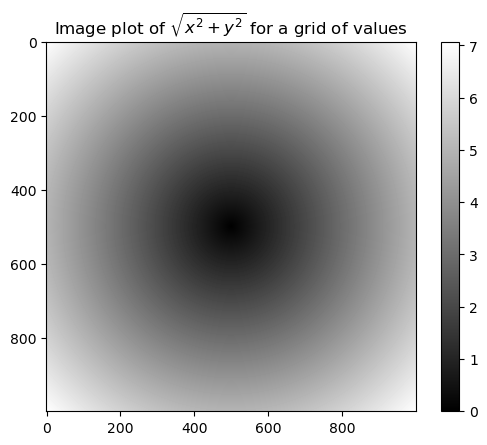

In [86]:
# matplotlib을 사용해 2차원 배열 시각화 가능
import matplotlib.pyplot as plt

plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 4.3.1 배열 연산으로 조건절 표현하기

In [87]:
# numpy.where 함수는 x if 조건 else y 같은 삼항식의 벡터화된 버전
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [89]:
# cond의 값이 True일 때는 arr의 값을 취하고, 아니면 yarr의 값을 취하고 싶다면 리스트 표기법을 이용해 작성
result =  [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
print(result)

[1.1, 2.2, 1.3, 1.4, 2.5]


In [90]:
# np.where을 사용하면 아주 간결하고 빠르게 작성 가능
result = np.where(cond, xarr, yarr)
print(result)

[1.1 2.2 1.3 1.4 2.5]


In [91]:
# np.where의 두번째, 세번째 인자는 배열이 아니어도 상관X
# 임의로 생성된 데이터가 들어있는 행렬이 있고 양수는 모두 2로, 음수는 모두 -2로 바꾸려면 np.where 사용
arr = np.random.randn(4, 4)
print(arr)
print(arr > 0)
print(np.where(arr > 0, 2, -2))

[[ 1.03570375  0.24615142 -2.37514759 -0.13911237]
 [ 0.85604209  0.21619518 -1.1657539  -0.51948714]
 [-0.87081519 -0.94314395  0.60979592  0.20445986]
 [-0.67892985 -0.86587233 -0.84563806 -0.31115747]]
[[ True  True False False]
 [ True  True False False]
 [False False  True  True]
 [False False False False]]
[[ 2  2 -2 -2]
 [ 2  2 -2 -2]
 [-2 -2  2  2]
 [-2 -2 -2 -2]]


In [92]:
# np.where을 사용해 스칼라값과 배열 조합 가능
# ex) arr의 모든 양수를 2로 바꾸기
print(np.where(arr > 0, 2, arr)) # 양수일 경우에만 2 대입

[[ 2.          2.         -2.37514759 -0.13911237]
 [ 2.          2.         -1.1657539  -0.51948714]
 [-0.87081519 -0.94314395  2.          2.        ]
 [-0.67892985 -0.86587233 -0.84563806 -0.31115747]]


### 4.3.2 수학 메서드와 통계 메서드

배열 전체 혹은 배열에서 한 축을 따르는 자료에 대한 통계를 계산하는 수학 함수는 배열 메서드로 사용 가능

In [ ]:
# 임의의 정규분포 데이터를 생성하고 집계
arr = np.random.randn(5, 4)
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

In [94]:
# mean이나 sum같은 함수는 선택적으로 axis 인자를 받아 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열 반환
print(arr.mean(axis=1))
print(arr.sum(axis=0))

[-0.5200419   0.11960149 -0.25213074 -0.09747313  0.65523537]
[ 4.08389731  2.17913899 -4.29095873 -2.35131317]


In [95]:
# cumsum과 sumprod 메서드는 중간 계산값을 담고 있는 배열 반환
arr = np.array([0,1,2,3,4,5,6,7])
print(arr.cumsum())

[ 0  1  3  6 10 15 21 28]


In [96]:
# 다차원 배열에서 cumsum같은 누산함수는 같은 크기의 배열 반환
# 축을 지정하여 부분적으로 계산하면 낮은 차수의 슬라이스 반환
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
print(arr)
print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


### 4.3.3 불리언 배열을 위한 메서드

In [97]:
# 이전 메서드의 불리언값을 1(True) 또는 0(False)으로 강제할 수 있음
# -> sum 메서드를 실행하면 불리언 배열에서 True인 원소의 개수를 셀 수 있음
arr = np.random.randn(100)
print((arr > 0).sum()) # 양수인 원소의 개수

46


In [98]:
# any와 all 메서드는 불리언 배열에 특히 유용
# any 메서드는 하나 이상의 값이 True인지 검사하고, all 메서드는 모든 원소가 True인지 검사
bools = np.array([False, False, True, False])
print(bools.any())
print(bools.all())

True
False


### 4.3.4 정렬

In [100]:
# 파이썬의 내장 리스트형처럼 NumPy 배열 역시 sort 메서드를 사용해 정렬 가능
arr = np.random.randn(6)
print(arr)
arr.sort()
print(arr)

[-0.67378734 -0.09525587 -1.12374843  1.24284887 -0.89547946 -1.31922367]
[-1.31922367 -1.12374843 -0.89547946 -0.67378734 -0.09525587  1.24284887]


In [101]:
# 다차원 배열의 정렬은 sort 메서드에 넘긴 축의 값에 따라 1차원 부분 정렬
arr = np.random.randn(5,3)
print(arr)
arr.sort(1) # axis = 1

[[-0.70439523  0.59352889 -0.4992282 ]
 [-0.16349448  0.50234165 -0.21398516]
 [ 1.12400916 -0.9808423  -0.25359739]
 [-0.67879761  1.77173645  0.7269201 ]
 [ 0.57333027 -0.33181885 -0.01612958]]


In [102]:
# np.sort : 배열을 직접 변경하지 않고 정렬된 결과를 가지고 있는 복사본 반환
# 배열의 분위수 구하기 : 배열을 정렬한 후 특정 분위의 값 선택하기
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% 분위수

-1.7099417690450587

### 4.3.5 집합 관련 함수

In [105]:
# NumPy : 1차원 ndarray를 위한 몇 가지 기본적인 집합 연산 제공
# np.unique : 배열 내에서 중복된 원소를 제거하고 남은 원소를 정렬된 형태로 반환
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

ints = np.array([3,3,3,2,2,1,1,4,4])
print(np.unique(ints))

['Bob' 'Joe' 'Will']
[1 2 3 4]


In [106]:
# np.unique를 순수 파이썬만으로 구현하기
sorted(set(names))

['Bob', 'Joe', 'Will']

In [108]:
# np.in1d 함수는 두 개의 배열을 인자로 받아서 첫 번째 배열의 원소가 두 번째 배열의 원소를 포함하는지 나타내는 불리언 배열 반환
values = np.array([6,0,0,3,2,5,6])
print(np.in1d(values, [2,3,6]))

[ True False False  True  True False  True]


## 4.4 배열 데이터의 파일 입출력

NumPy는 디스크에서 텍스트나 바이너리 형식의 데이터를 불러오거나 저장할 수 있음

In [109]:
# np.save와 np.load는 배열 데이터를 효과적으로 디스크에 저장하고 불러오는 함수
# → 배열은 기본적으로 압축되지않은 원시 바이너리 형식의 .npy 파일로 저장됨
arr = np.arange(10)
np.save('some_array', arr)

In [110]:
# 저장되는 파일 경로가 .npy로 끝나지 않으면 자동적으로 확장자 추가됨
# np.load를 통해 불러오기
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [111]:
# np.savez 함수를 이용해 여러 개의 배열을 압축된 형식으로 저장하기(저장하려는 배열을 키워드 인자 형태로 전달)
np.savez('array_archive.npz', a = arr, b = arr)

In [112]:
# npz파일을 불러올 때, 각각의 배열을 필요할 때 불러올 수 있도록 사전 형식의 객체에 저장
arch = np.load('array_archive.npz')
print(arch['b'])

[0 1 2 3 4 5 6 7 8 9]


In [113]:
# 압축이 잘되는 형식의 데이터라면 numpy.savez_compressed 사용
np.savez_compressed('arrays_compressed.npz', a = arr, b = arr)

## 4.5 선형대수

두 개의 2차원 배열을 * 연산자로 곱하면 행렬 곱셈이 아니라 대응하는 각각의 원소의 곱을 계산

In [114]:
# 행렬곱셈 : 배열 메서드이자 numpy 네임스페이스 안에 있는 dot 함수를 이용해 계산
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6.,23.], [-1,7],[8,9]])
print(x)
print(y)
print(x.dot(y))

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]]
[[ 28.  64.]
 [ 67. 181.]]


In [116]:
# np.dot(x,y)와 x.dot(y)는 동일함
print(np.dot(x,y))

[[ 28.  64.]
 [ 67. 181.]]


In [117]:
# 2차원 배열과 곱셈이 가능한 크기의 1차원 배열 간의 행렬 곱셈의 결과는 1차원 배열
print(np.dot(x, np.ones(3)))

[ 6. 15.]


In [120]:
# @ 기호 : 행렬 곱셈을 수행하는 연산자
print(x @ np.ones(3))

[ 6. 15.]


In [122]:
# numpy.linalg : 행렬의 분할과 역행렬, 행렬식과 같은 것들을 포함
from numpy.linalg import inv, qr
X = np.random.randn(5,5)
mat = X.T.dot(X) # X.T.의 전치행렬과 X의 곱을 계산
print(inv(mat))
print(mat.dot(inv(mat)))

q, r = qr(mat)
print(r)

[[ 8.25165178 -0.77058334 -6.31770253 -2.09188448  2.29928756]
 [-0.77058334  0.49272875  0.87783632  0.37516343 -0.29961012]
 [-6.31770253  0.87783632  5.37208179  1.84139258 -1.88248064]
 [-2.09188448  0.37516343  1.84139258  0.92309423 -0.75146956]
 [ 2.29928756 -0.29961012 -1.88248064 -0.75146956  0.85843117]]
[[ 1.00000000e+00  1.04084502e-16  1.46530909e-16  7.70195061e-17
  -8.74129335e-16]
 [-5.20766428e-17  1.00000000e+00 -9.67453598e-16  4.43305394e-16
   3.75965905e-16]
 [-1.06787982e-15  6.11230804e-17  1.00000000e+00  3.01952014e-16
  -1.13089323e-16]
 [ 1.64881245e-15 -2.93751979e-16  3.01684131e-16  1.00000000e+00
  -5.38298938e-17]
 [-1.26127167e-15 -2.18004494e-17  2.64871257e-16 -8.05330701e-17
   1.00000000e+00]]
[[-3.12955332  3.16864348 -4.12262192  2.32345913  2.83850246]
 [ 0.         -3.1906678   0.5076259   3.43712418  3.37326468]
 [ 0.          0.         -1.77839105 -0.01074915 -4.86457369]
 [ 0.          0.          0.         -3.8520857  -3.66575706]
 [ 0. 

## 4.6 난수 생성

In [123]:
# numpy.random 모듈은 파이썬 내장 random 함수를 보강하여 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성하는데 주로 사용됨
# ex) normal을 사용해 표준정규분포로부터 4x4 크기 표본 생성 가능
samples = np.random.normal(size=(4,4))
print(samples)

[[ 0.52415638 -0.77506927  0.17842069  1.56292063]
 [-0.02144904  0.65551551 -0.14880697  0.82452963]
 [-0.4066878  -0.25984639  0.05292557 -0.14082721]
 [ 0.74386579 -1.11593526 -1.3492288  -0.47051657]]


In [125]:
# 파이썬 내장 random 모듈은 한 번에 하나의 값만 생성 가능
# numpy.random은 매우 큰 표본을 생성하는데 파이썬 내장 모듈보다 수십 배 이상 빠름
from random import normalvariate
N = 1000000

#%timeit samples = [normalvariate(0,1) for _ in range(N)]
%timeit np.random.normal(size=N)

2.96 s ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
82.8 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [126]:
# 유사 난수 -> 난수 생성기의 시드값에 따라 정해진 난수를 알고리즘으로 생성
# NumPy 난수 생성기의 시드값은 np.random.seed를 이용해서 변경 가능
np.random.seed(1234)

In [127]:
# numpy.random.RandomState를 이용해 다른 난수 생성기로부터 격리된 난수 생성기를 만들 수 있음
rng = np.random.RandomState(1234)
print(rng.randn(10))

[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]


## 4.7 계단오르내리기 예제

In [133]:
import random
position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

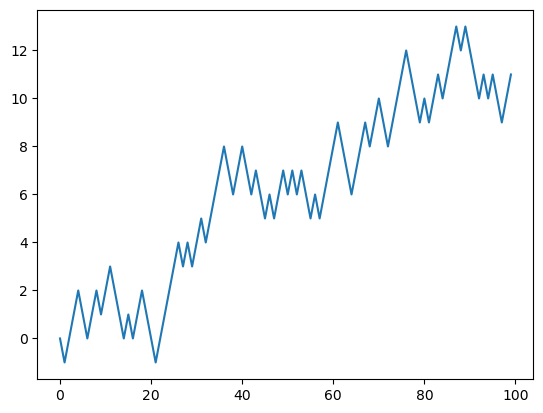

In [134]:
plt.plot(walk[:100])

In [135]:
# walk : 계단을 오르거나(+1) 내려간(-1) 값의 누적합
# np.random 모듈을 사용해 1000번 수행한 결과 (1,-1)를 한번에 저장하고 누적합 계산
nsteps = 1000
draws = np.random.randint(0, 2, size = nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [136]:
# 계단을 오르내린 위치의 최솟값과 최댓값같은 간단한 통계 구하기
print(walk.min())
print(walk.max())

-9
60


In [139]:
# 계단의 처음 위치에서 최초로 10칸 떨어지기까지 얼마나 걸렸는지
# 최초의 10이나 최초의 -10인 시점을 구해야하므로 불리언 배열에서 최댓값의 처음 색인을 반환하는 argmax 사용
(np.abs(walk) >= 10).argmax()

297

### 4.7.1 한번에 시뮬레이션하기

In [141]:
# 5000회 시뮬레이션으로 바꿔보기
# numpy.random 함수에 크기가 2인 튜플 넘기면 2차원 배열 생성 -> 각 컬럼에서 누적합 구하기
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2, size=(nwalks, nsteps)) # 0 또는 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
print(walks)

[[  1   2   3 ...  46  47  46]
 [  1   0   1 ...  40  41  42]
 [  1   2   3 ... -26 -27 -28]
 ...
 [  1   0   1 ...  64  65  66]
 [  1   2   1 ...   2   1   0]
 [ -1  -2  -3 ...  32  33  34]]


In [142]:
# 모든 시뮬레이션의 최댓값과 최솟값
print(walks.max())
print(walks.min())

122
-128


In [143]:
# 누적합이 30 혹은 -30이 되는 최소 시점 계산해보기
# 모든 경우가 30에 도달하지 않기 때문에 까다롭지만 any 메서드를 사용해 해결
hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
print(hits30.sum())

[ True  True  True ...  True False  True]
3368


In [145]:
# 불리언 배열을 사용해 walks에서 컬럼을 선택하고 절댓값이 30을 넘는 경우에 대해 
# 축 1의 argmax 값을 구하면 처음 위치에서 30칸 이상 멀어지는 최소 횟수 구하기 가능
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
print(crossing_times.mean())

509.99762470308787


In [147]:
# normal 함수에 표준편차와 평균값을 넣어서 정규분포에서 표본 추출하는 것처럼 난수발생함수 사용
steps = np.random.normal(loc = 0, scale = 0.25, size=(nwalks, nsteps))
steps

array([[ 0.34363475, -0.05522411,  0.05083405, ..., -0.33842559,
        -0.0230145 ,  0.23113296],
       [ 0.16099452, -0.50311406,  0.18528403, ...,  0.2945566 ,
        -0.12584062, -0.19622136],
       [ 0.26578933, -0.09885966,  0.23270679, ...,  0.16738906,
         0.060458  ,  0.28324365],
       ...,
       [ 0.24418693,  0.58143407,  0.01644158, ...,  0.11702547,
        -0.02086471,  0.00513563],
       [-0.15765375, -0.19420976,  0.0542288 , ...,  0.15976314,
         0.22189473,  0.07530368],
       [ 0.37258899, -0.0645595 , -0.42768902, ...,  0.28853102,
        -0.25261274, -0.32302591]])